In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 800)


In [2]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=False)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df).sort_values(by="Ratio", ascending=False)
    return missing_df


def check_df(dataframe, head=5, tail=5):
    print("*" * 70)
    print(" Shape ".center(70, "*"))
    print("*" * 70)
    print(dataframe.shape)

    print("*" * 70)
    print(" Types ".center(70, "*"))
    print("*" * 70)
    print(dataframe.dtypes)

    print("*" * 70)
    print(" Head ".center(70, "*"))
    print("*" * 70)
    print(dataframe.head(head))

    print("*" * 70)
    print(" Tail ".center(70, "*"))
    print("*" * 70)
    print(dataframe.tail(tail))

    print("*" * 70)
    print(" NA ".center(70, "*"))
    print("*" * 70)
    print(missing_values_analysis(dataframe))

    print("*" * 70)
    print(" Quantiles ".center(70, "*"))
    print("*" * 70)
    print(dataframe.describe([.01, .05, .1, .5, .9, .95, .99]).T)

    print("*" * 70)
    print(" Duplicate Rows ".center(70, "*"))
    print("*" * 70)
    print(dataframe.duplicated().sum())

    print("*" * 70)
    print(" Uniques ".center(70, "*"))
    print("*" * 70)
    print(dataframe.nunique())

In [3]:
train = pd.read_csv("./data/train.csv", encoding="latin-1")
test = pd.read_csv("./data/test.csv", encoding="latin-1")


In [4]:
check_df(train)


**********************************************************************
******************************* Shape ********************************
**********************************************************************
(2822, 11)
**********************************************************************
******************************* Types ********************************
**********************************************************************
ID                      int64
DiagnosticICD10Code    object
SurgeryGroup           object
AnesthesiaType         object
SurgeryName            object
Age                     int64
Sex                    object
Service                object
DoctorID                int64
AnaesthetistID          int64
ElapsedTime(second)     int64
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
     I

In [5]:
check_df(test)


**********************************************************************
******************************* Shape ********************************
**********************************************************************
(1211, 10)
**********************************************************************
******************************* Types ********************************
**********************************************************************
ID                      int64
DiagnosticICD10Code    object
SurgeryGroup           object
AnesthesiaType         object
SurgeryName            object
Age                     int64
Sex                    object
Service                object
DoctorID                int64
AnaesthetistID          int64
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
     ID DiagnosticICD10Code SurgeryG

In [6]:
app_train = train.copy()
app_test = test.copy()
app_train.drop_duplicates(inplace=True)
app_train.drop_duplicates(subset=["ID"], keep='first', inplace=True)


In [7]:
train[train.ID == 2273]


,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
1221,2273,"{nan, 'M20.1', 'I87.2'}","{'B', 'C'}",Spinal Anestezi,NaN,60,FEMALE,ORTOPED? SERV?S?,32,11,6474
1871,2273,"{nan, 'M20.1', 'I87.2'}","{'B', 'C'}",Spinal Anestezi,NaN,60,FEMALE,ORTOPED? SERV?S?,32,11,6472


In [8]:
app_train[app_train.ID == 2273]


,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
1221,2273,"{nan, 'M20.1', 'I87.2'}","{'B', 'C'}",Spinal Anestezi,NaN,60,FEMALE,ORTOPED? SERV?S?,32,11,6474


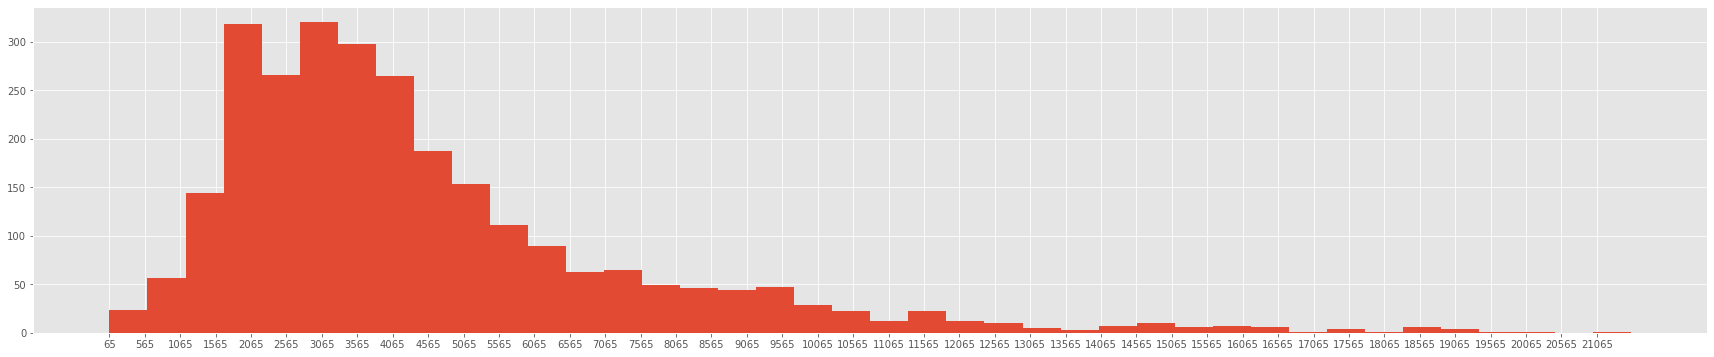

In [9]:
plt.figure(figsize=(30,6))
plt.style.use('ggplot')
plt.hist(app_train["ElapsedTime(second)"], bins=40)
plt.xticks(range(min(app_train["ElapsedTime(second)"]), max(app_train["ElapsedTime(second)"])+1, 500))
plt.show()


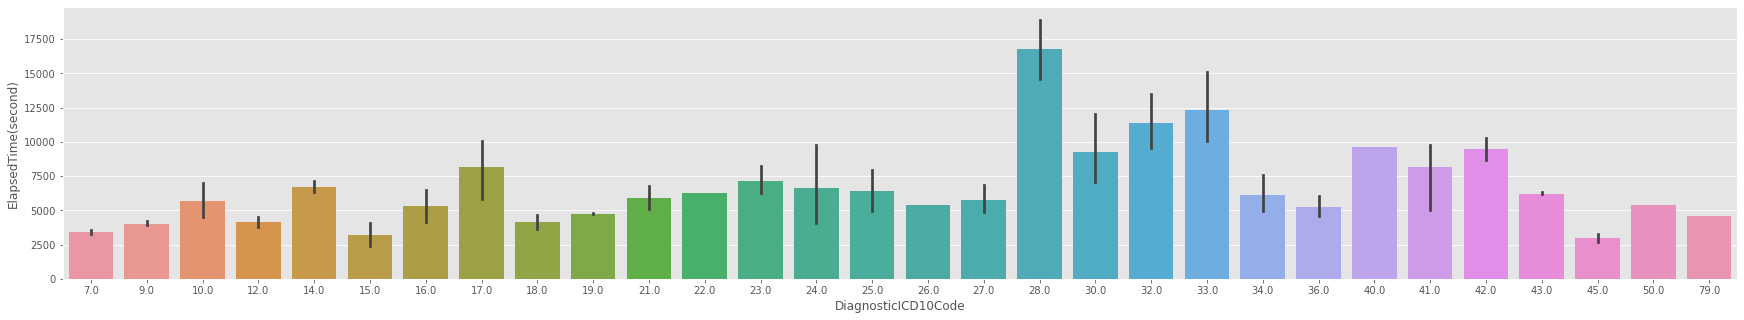

In [10]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=train["DiagnosticICD10Code"].str.len(), y="ElapsedTime(second)", data=train)
plt.show()

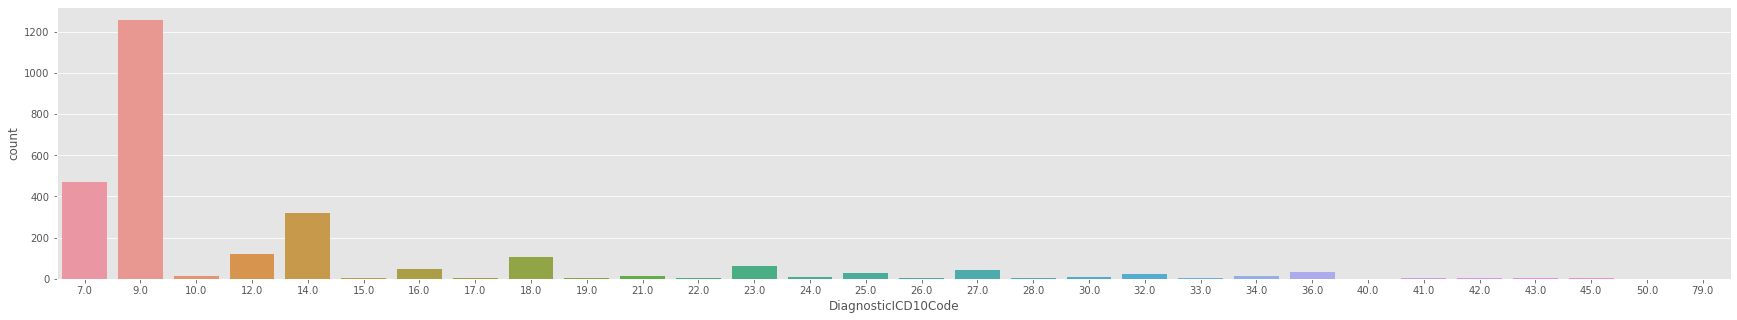

In [11]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.countplot(x=train["DiagnosticICD10Code"].str.len(), data=train)
plt.show()

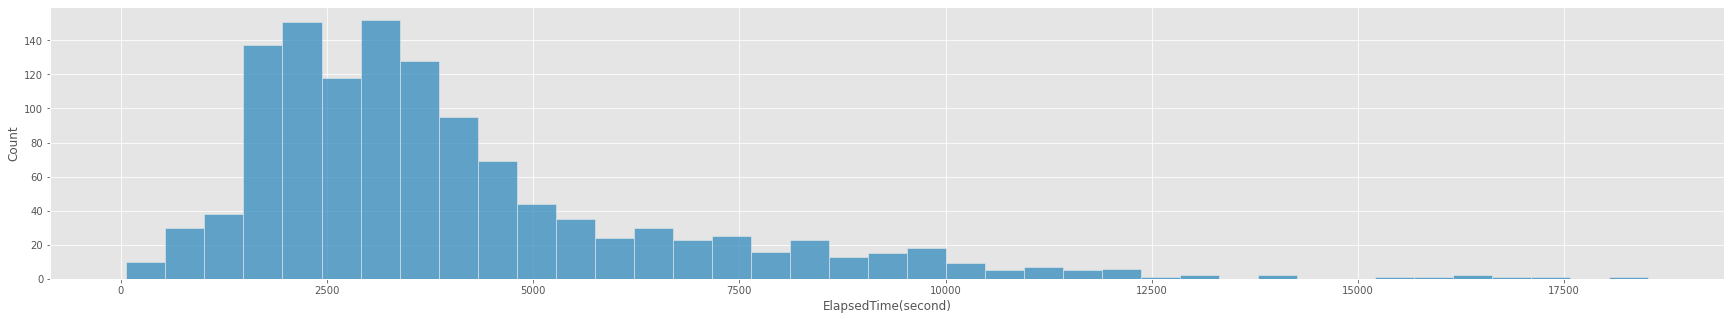

In [12]:
df = app_train[app_train['DiagnosticICD10Code'].str.len()==9]
fig, ax = plt.subplots(figsize=(30, 5))
sns.histplot(df["ElapsedTime(second)"]);


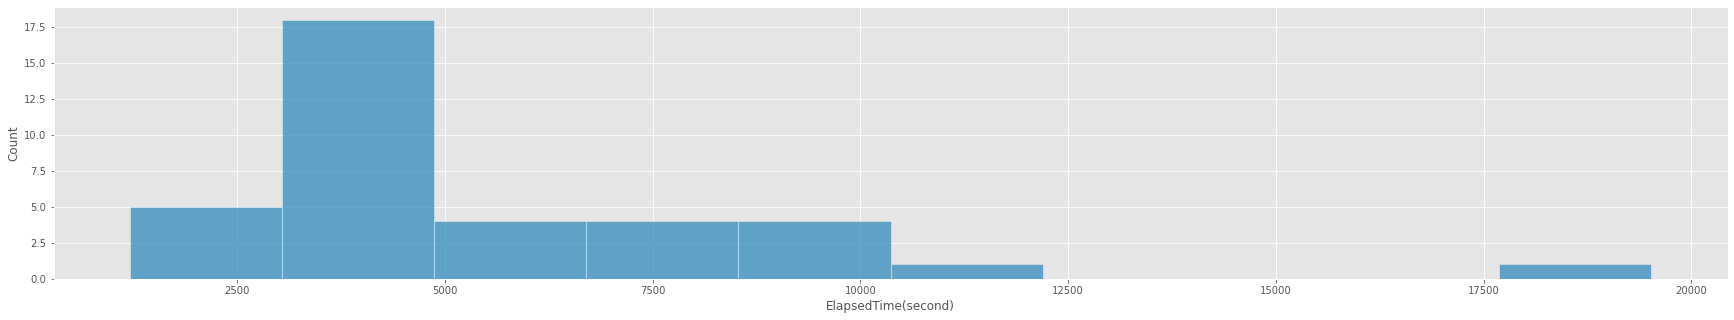

In [13]:
df = app_train[app_train['DiagnosticICD10Code'].str.len()==27]
fig, ax = plt.subplots(figsize=(30, 5))
sns.histplot(df["ElapsedTime(second)"]);


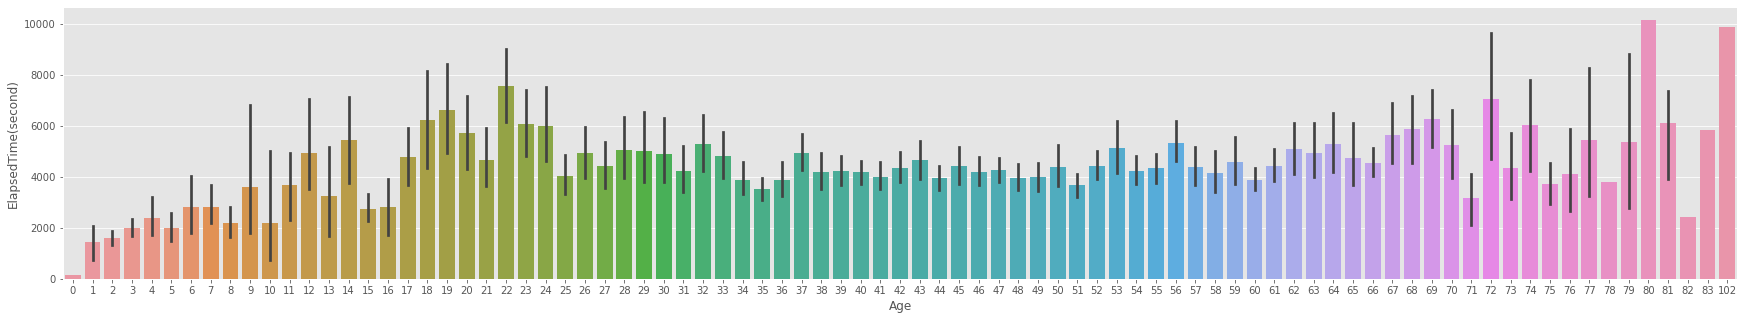

In [14]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=train["Age"], y="ElapsedTime(second)", data=train)
plt.show()


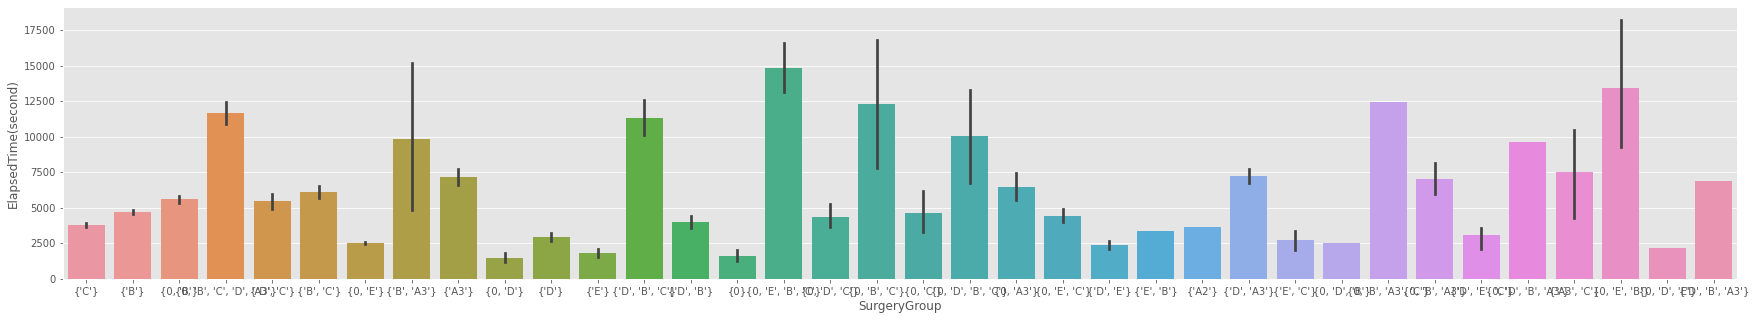

In [15]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=app_train["SurgeryGroup"], y="ElapsedTime(second)", data=app_train)
plt.show()


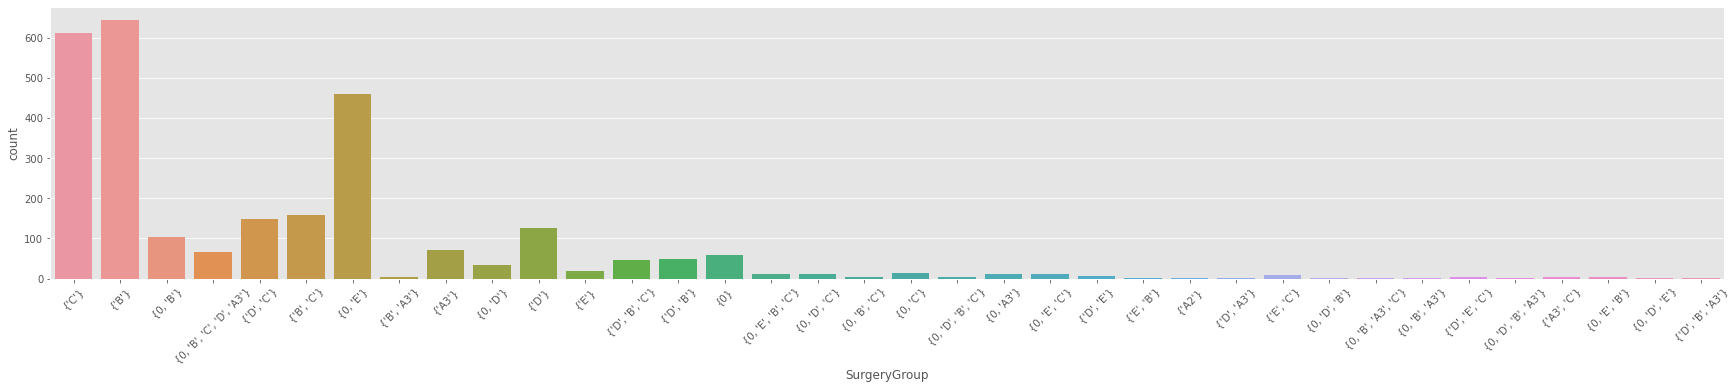

In [16]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.countplot(x=app_train["SurgeryGroup"], data=app_train)
plt.xticks(rotation=45)
plt.show()


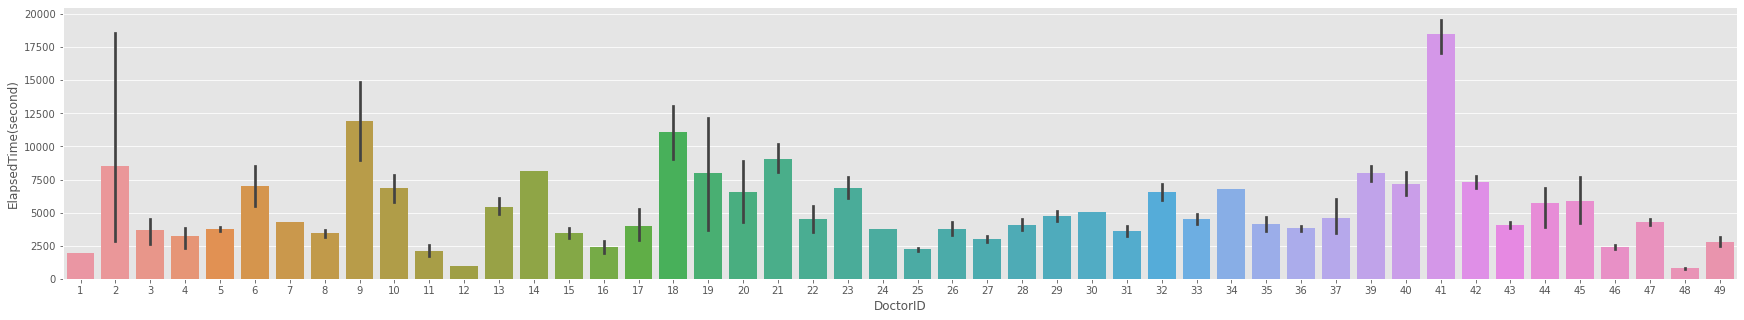

In [17]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=app_train["DoctorID"], y="ElapsedTime(second)", data=app_train)
plt.show()


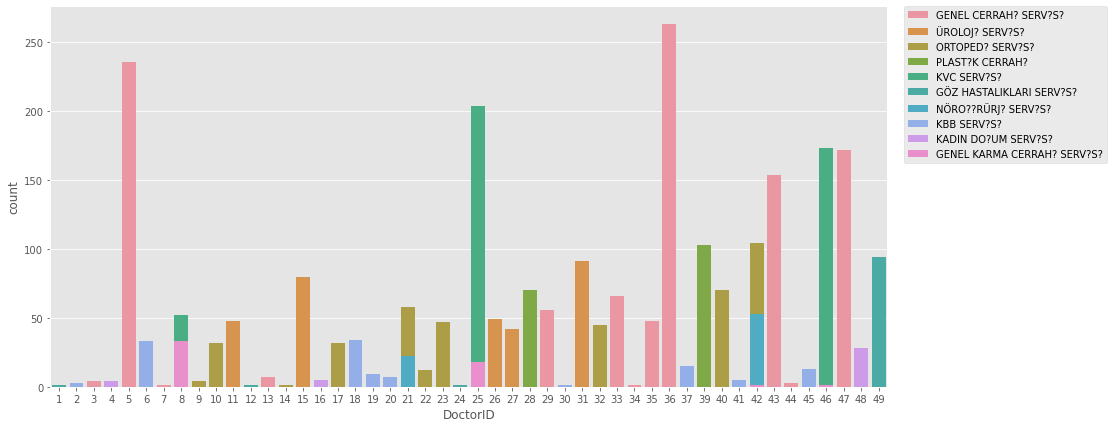

In [18]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(x=app_train["DoctorID"], hue="Service", dodge=False, data=app_train)
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0);
plt.show()


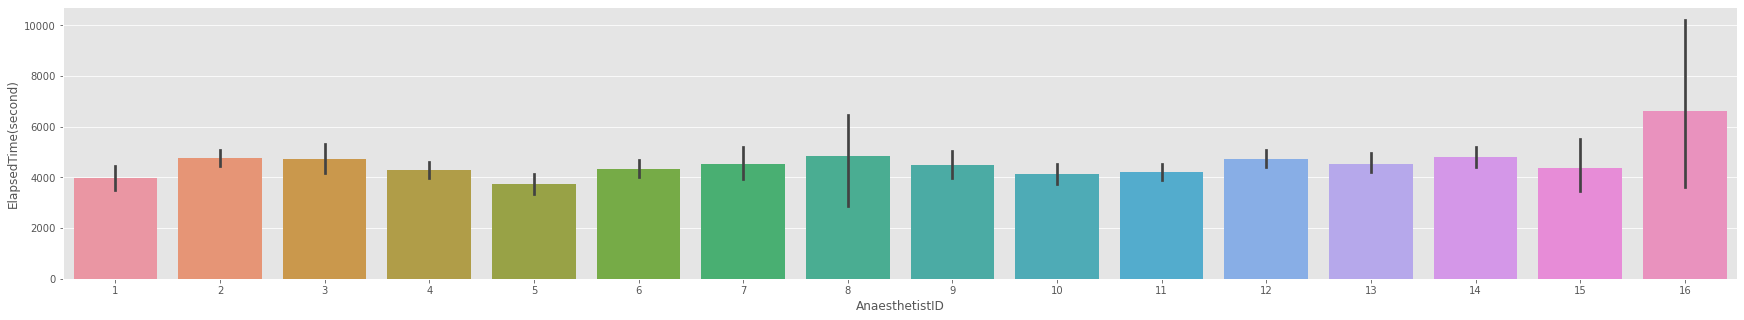

In [19]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=app_train["AnaesthetistID"], y="ElapsedTime(second)", data=app_train)
plt.show()


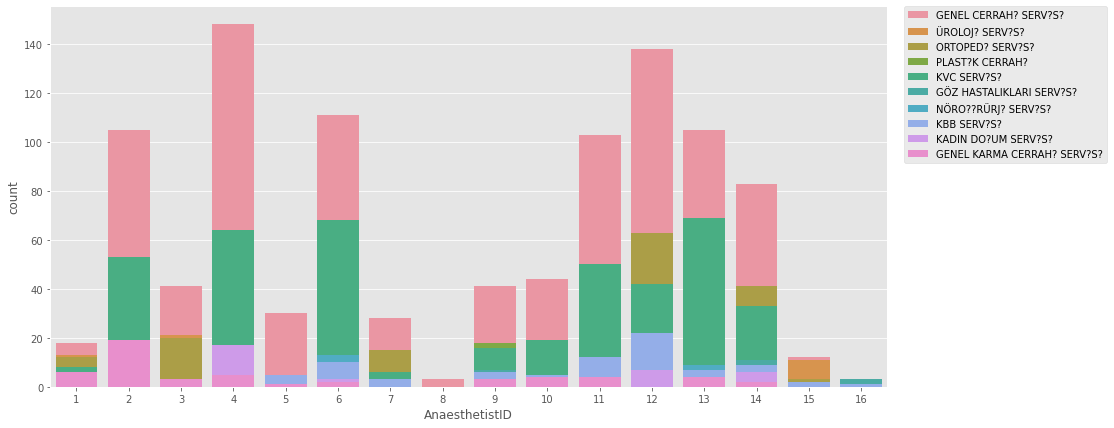

In [20]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(x=app_train["AnaesthetistID"], hue="Service", dodge=False, data=app_train)
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0);
plt.show()


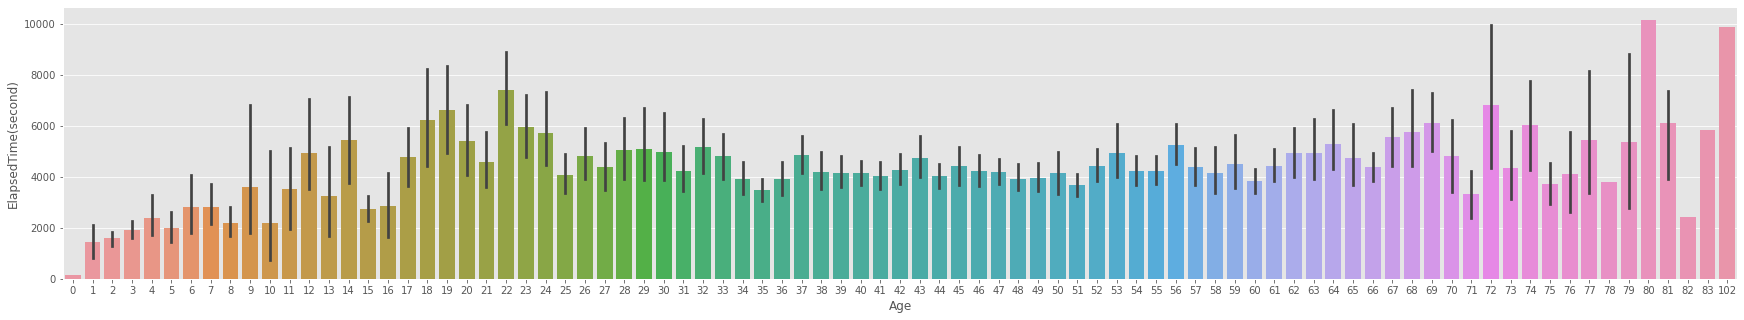

In [21]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=app_train["Age"], y="ElapsedTime(second)", data=app_train)
plt.show()


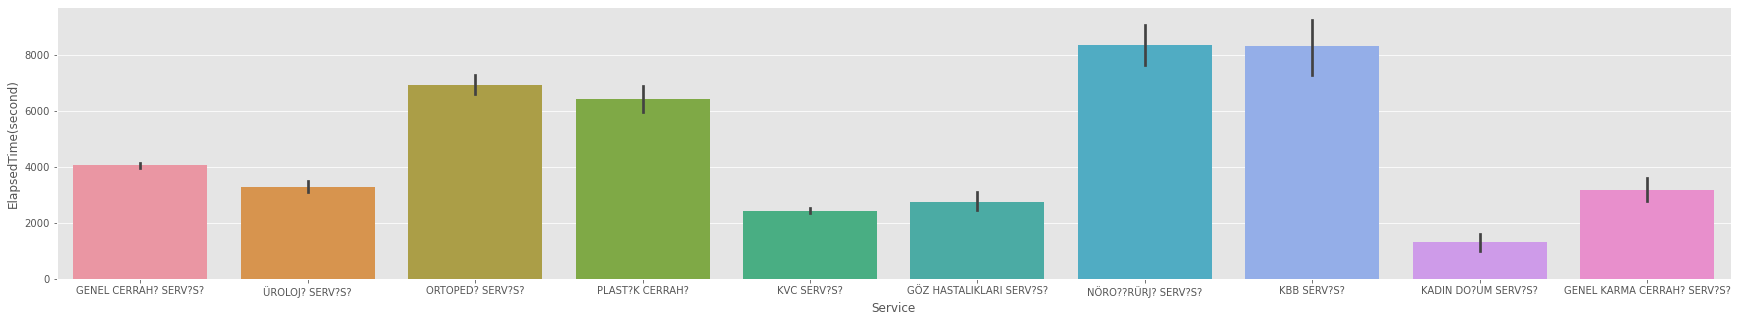

In [22]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=app_train["Service"], y="ElapsedTime(second)", data=app_train)
plt.show()


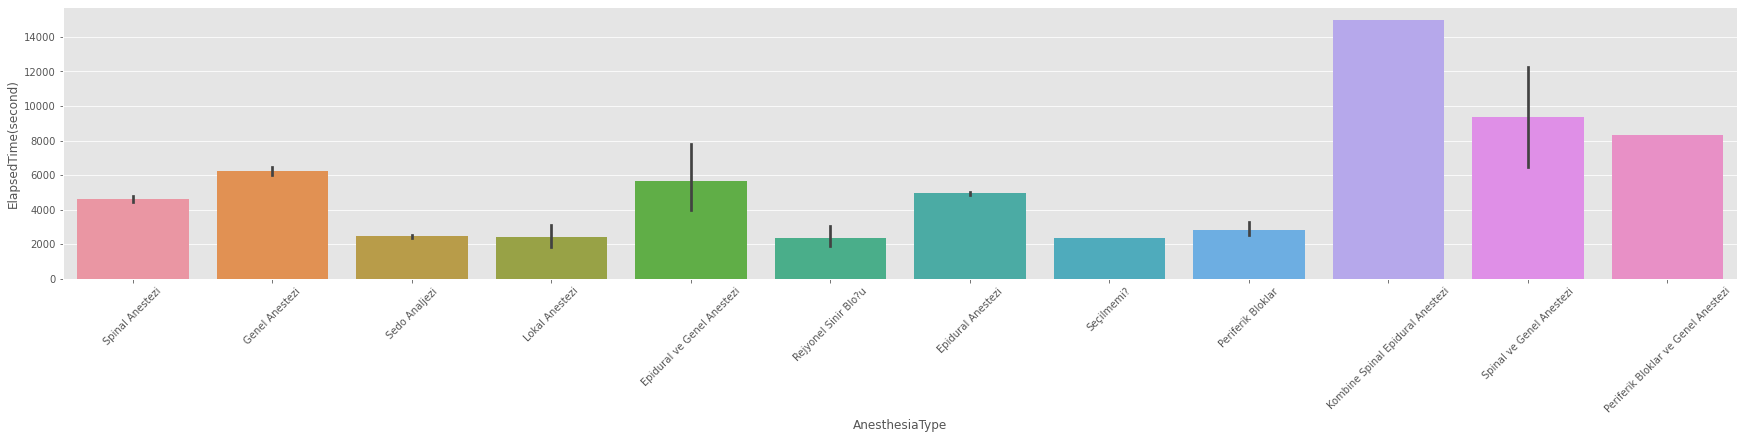

In [23]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x="AnesthesiaType", y="ElapsedTime(second)", data=app_train)
plt.xticks(rotation=45)
plt.show()


In [24]:
fig = px.pie(app_train, values= app_train.index, names='Sex', title='Gender Percentage', width= 600, height=300)
fig.show()

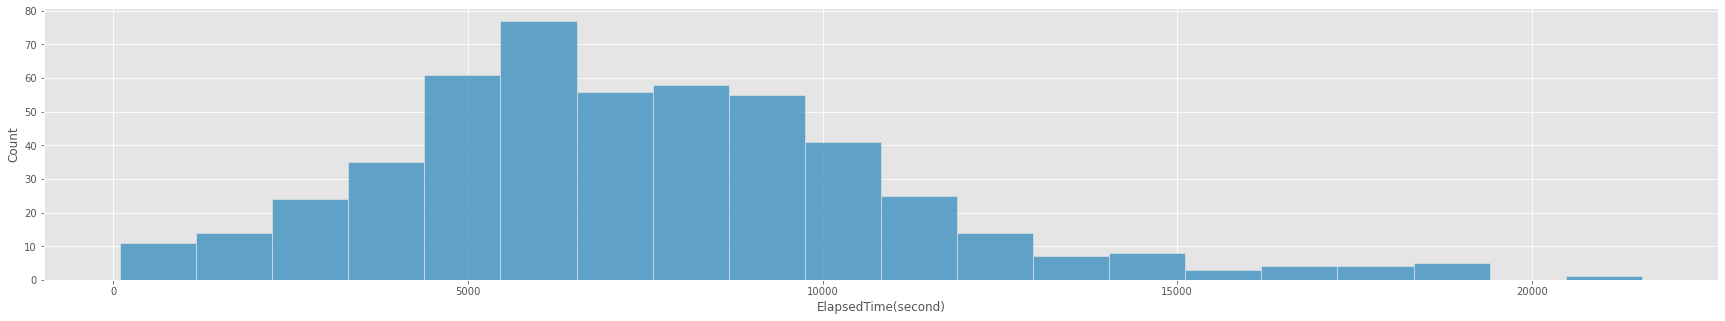

In [25]:
df = app_train[app_train["DiagnosticICD10Code"].str.contains('M', na=False)]
fig, ax = plt.subplots(figsize=(30, 5))
sns.histplot(x="ElapsedTime(second)", data=df)
plt.show()


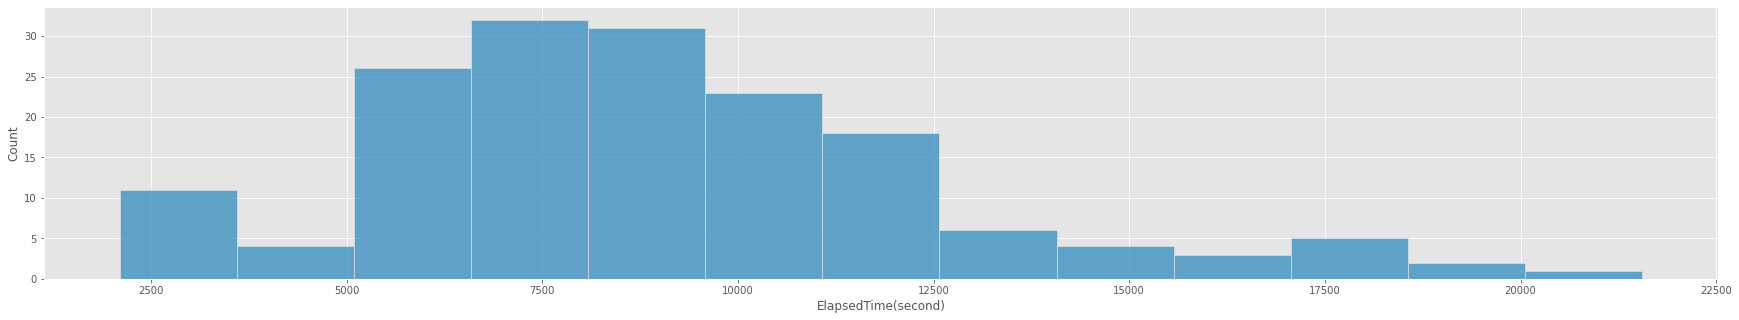

In [26]:
df = app_train[app_train["SurgeryGroup"].str.contains('A', na=False)]
fig, ax = plt.subplots(figsize=(30, 5))
sns.histplot(x= "ElapsedTime(second)", data=df)
plt.show()


In [27]:
app_train_clean = app_train.copy()
app_train_clean["DiagnosticICD10Code"] = app_train_clean["DiagnosticICD10Code"].str[1:-1]
app_train_clean["DiagnosticICD10Code"] = app_train_clean["DiagnosticICD10Code"].str.replace("'","")
app_train_clean["SurgeryGroup"] = app_train_clean["SurgeryGroup"].str[1:-1]
app_train_clean["SurgeryGroup"] = app_train_clean["SurgeryGroup"].str.replace("'","")
app_train_clean.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
0,1829,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333
1,1104,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972
2,1850,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647
3,1059,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871
4,608,"M51.1, nan, M48.0","0, B, C, D, A3",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046


In [28]:
app_test_clean = app_test.copy()
app_test_clean["DiagnosticICD10Code"] = app_test_clean["DiagnosticICD10Code"].str[1:-1]
app_test_clean["DiagnosticICD10Code"] = app_test_clean["DiagnosticICD10Code"].str.replace("'","")
app_test_clean["SurgeryGroup"] = app_test_clean["SurgeryGroup"].str[1:-1]
app_test_clean["SurgeryGroup"] = app_test_clean["SurgeryGroup"].str.replace("'","")
app_test_clean.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID
0,1669,H26.9,C,Sedo Analjezi,NaN,70,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,13
1,2091,L05.9,C,Spinal Anestezi,Pilonidal kist,41,MALE,GENEL CERRAH? SERV?S?,36,6
2,585,M50.1,A3,Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",59,FEMALE,ORTOPED? SERV?S?,42,14
3,1455,S42.2,B,Genel Anestezi,Humerus üst uç k?r???,54,FEMALE,ORTOPED? SERV?S?,23,14
4,1801,I82,"0, E",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,50,MALE,KVC SERV?S?,46,13


In [29]:
app_train_clean['Any_NaN_Diagnos'] = app_train_clean['DiagnosticICD10Code'].apply(lambda x: 1 if 'nan,' in str(x) else 0)
app_test_clean['Any_NaN_Diagnos'] = app_test_clean['DiagnosticICD10Code'].apply(lambda x: 1 if 'nan,' in str(x) else 0)

In [30]:
def clean_diagnosis(diagnosis):
    if isinstance(diagnosis, str):
        return set(diagnosis.replace(', nan', '').replace(' nan,', '').replace('nan,', '').replace(' ', '').split(','))
    else:
        return diagnosis

app_train_clean['Diagnos_Clean'] = app_train_clean['DiagnosticICD10Code'].apply(clean_diagnosis)
app_test_clean['Diagnos_Clean'] = app_test_clean['DiagnosticICD10Code'].apply(clean_diagnosis)

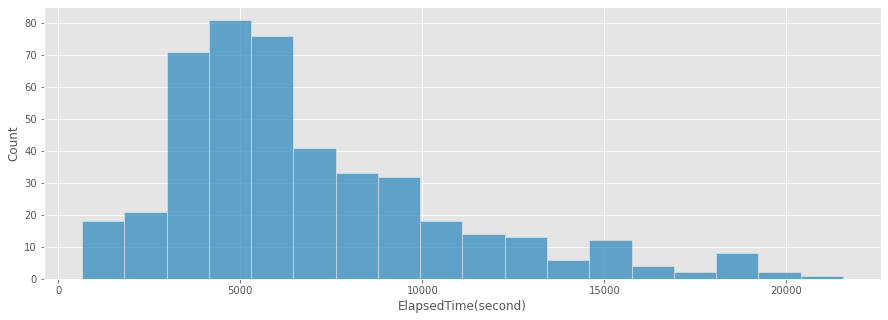

In [31]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(x="ElapsedTime(second)", data=app_train_clean[app_train_clean["Any_NaN_Diagnos"]==1])
plt.show()

In [32]:
map_dict = {'0': 1, 'E': 1, 'D': 2, 'C': 3, 'B': 4, 'A3': 5, 'A2': 6, 'A1': 7}
mapper = lambda x: [map_dict[val.strip()] for val in x.split(',')]
app_train_clean["SurgeryGroup_Encode"] = app_train_clean["SurgeryGroup"].apply(mapper)
app_test_clean["SurgeryGroup_Encode"] = app_test_clean["SurgeryGroup"].apply(mapper)

In [33]:
app_train_clean["SurgeryGroup_Sum"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.sum(x))
app_train_clean["SurgeryGroup_Count"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: len(x))
app_train_clean["SurgeryGroup_Avg"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.mean(x))
app_train_clean["SurgeryGroup_Std"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.std(x))
app_train_clean["SurgeryGroup_Max"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.max(x))
app_train_clean["SurgeryGroup_Min"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.min(x))

In [34]:
app_test_clean["SurgeryGroup_Sum"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.sum(x))
app_test_clean["SurgeryGroup_Count"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: len(x))
app_test_clean["SurgeryGroup_Avg"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.mean(x))
app_test_clean["SurgeryGroup_Std"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.std(x))
app_test_clean["SurgeryGroup_Max"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.max(x))
app_test_clean["SurgeryGroup_Min"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.min(x))

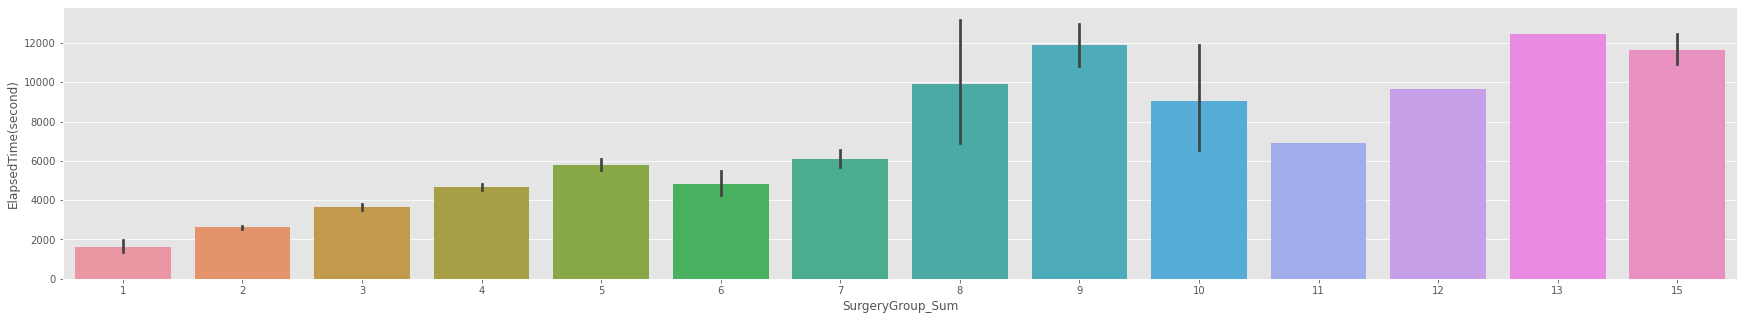

In [35]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x="SurgeryGroup_Sum", y="ElapsedTime(second)", data=app_train_clean)
plt.show()


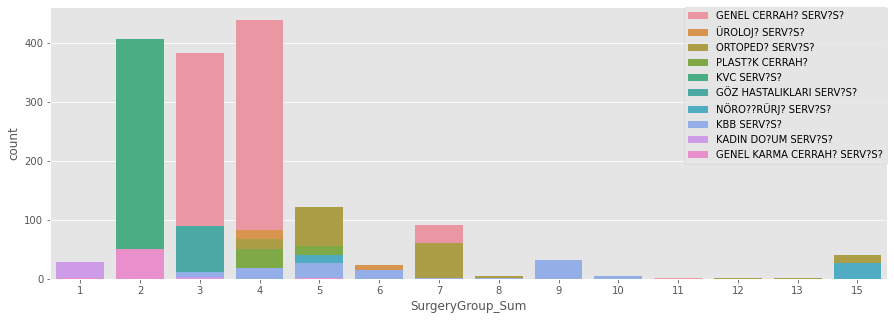

In [36]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x="SurgeryGroup_Sum", hue="Service", dodge=False, data=app_train_clean)
plt.legend(loc='upper right', borderaxespad=0);
plt.show()


In [37]:
app_train_clean[app_train_clean["ID"]==3228]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min
92,3228,"K21.9, J15.9, N30.0, N21.1, N30.9, L30.3, N40,...",B,Spinal Anestezi,Üretra ta??,68,MALE,ÜROLOJ? SERV?S?,15,2,4581,0,"{N30.0, N40, M19.9, L30.3, J15.9, K21.9, N32.0...",[4],4,1,4.0,0.0,4,4


In [38]:
app_train_clean[app_train_clean["ID"]==245]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min
2014,245,"K21.9, J15.9, R31, N30.0, M19.9, I10",C,Spinal Anestezi,NaN,71,MALE,ÜROLOJ? SERV?S?,15,2,5415,0,"{N30.0, M19.9, R31, I10, J15.9, K21.9}",[3],3,1,3.0,0.0,3,3


In [39]:
app_train_clean.loc[92, "Diagnos_Clean"] = np.nan
app_train_clean.loc[2014, "Diagnos_Clean"] = np.nan

In [40]:
app_train_clean["Diagnos_Clean"] = app_train_clean["Diagnos_Clean"].fillna('')
app_train_clean['Diagnos_Clean'] = app_train_clean['Diagnos_Clean'].apply(lambda x: sorted(x, key=lambda d: d[0]))

In [41]:
app_test_clean.loc[787, "Diagnos_Clean"] = np.nan
app_test_clean.loc[285, "Diagnos_Clean"] = np.nan

In [42]:
app_test_clean["Diagnos_Clean"] = app_test_clean["Diagnos_Clean"].fillna('')
app_test_clean['Diagnos_Clean'] = app_test_clean['Diagnos_Clean'].apply(lambda x: sorted(x, key=lambda d: d[0]))

In [43]:
from tqdm import tqdm
from tqdm.notebook import tqdm
tqdm.pandas()
import itertools


# function to generate all possible combinations with first characters for a set of diagnoses
def generate_combinations_first_char(diagnoses):
    diagnoses = [d for d in diagnoses if pd.notna(d)]
    first_chars = [diag[0] for diag in diagnoses]
    combinations = []
    for i in range(1, len(diagnoses)+1):
        for combo in itertools.combinations(first_chars, i):
            combinations.append('-'.join(combo))
    return combinations

# function to generate all possible combinations with all characters for a set of diagnoses
def generate_combinations_all_char(diagnoses):
    diagnoses = [d for d in diagnoses if pd.notna(d)]
    first_chars = [diag for diag in diagnoses]
    combinations = []
    for i in range(1, len(diagnoses)+1):
        for combo in itertools.combinations(first_chars, i):
            combinations.append('-'.join(combo))
    return combinations

# generate all combinations for each patient and add them as new columns to the DataFrame
for i, row in tqdm(app_train_clean.iterrows(), total=len(app_train_clean)):
    combos = generate_combinations_first_char(row['Diagnos_Clean'])
    for j, combo in enumerate(combos):
        col_name = f'combination_first_{j+1}'
        app_train_clean.at[i, col_name] = combo

for i, row in tqdm(app_train_clean.iterrows(), total=len(app_train_clean)):
    combos = generate_combinations_all_char(row['Diagnos_Clean'])
    for j, combo in enumerate(combos):
        col_name = f'combination_all_{j+1}'
        app_train_clean.at[i, col_name] = combo

app_train_clean.head()

  0%|          | 0/2714 [00:00<?, ?it/s]

  0%|          | 0/2714 [00:00<?, ?it/s]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,combination_first_1,combination_first_2,combination_first_3,combination_first_4,combination_first_5,combination_first_6,combination_first_7,combination_first_8,combination_first_9,combination_first_10,combination_first_11,combination_first_12,combination_first_13,combination_first_14,combination_first_15,combination_first_16,combination_first_17,combination_first_18,combination_first_19,combination_first_20,combination_first_21,combination_first_22,combination_first_23,combination_first_24,combination_first_25,combination_first_26,combination_first_27,combination_first_28,combination_first_29,combination_first_30,combination_first_31,combination_all_1,combination_all_2,combination_all_3,combination_all_4,combination_all_5,combination_all_6,combination_all_7,combination_all_8,combination_all_9,combination_all_10,combination_all_11,combination_all_12,combination_all_13,combination_all_14,combination_all_15,combination_all_16,combination_all_17,combination_all_18,combination_all_19,combination_all_20,combination_all_21,combination_all_22,combination_all_23,combination_all_24,combination_all_25,combination_all_26,combination_all_27,combination_all_28,combination_all_29,combination_all_30,combination_all_31
0,1829,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333,0,[L05],[3],3,1,3.0,0.000000,3,3,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1104,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972,0,[N20.1],[3],3,1,3.0,0.000000,3,3,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N20.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647,0,[K80.8],[4],4,1,4.0,0.000000,4,4,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K80.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1059,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871,1,[M51.1],"[1, 4]",5,2,2.5,1.500000,4,1,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M51.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,608,"M51.1, nan, M48.0","0, B, C, D, A3",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046,1,"[M48.0, M51.1]","[1, 4, 3, 2, 5]",15,5,3.0,1.414214,5,1,M,M,M-M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M48.0,M51.1,M48.0-M51.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
for i, row in tqdm(app_test_clean.iterrows(), total=len(app_test_clean)):
    combos = generate_combinations_first_char(row['Diagnos_Clean'])
    for j, combo in enumerate(combos):
        col_name = f'combination_first_{j+1}'
        app_test_clean.at[i, col_name] = combo

for i, row in tqdm(app_test_clean.iterrows(), total=len(app_test_clean)):
    combos = generate_combinations_all_char(row['Diagnos_Clean'])
    for j, combo in enumerate(combos):
        col_name = f'combination_all_{j+1}'
        app_test_clean.at[i, col_name] = combo

app_test_clean.head()

  0%|          | 0/1211 [00:00<?, ?it/s]

  0%|          | 0/1211 [00:00<?, ?it/s]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min,combination_first_1,combination_first_2,combination_first_3,combination_first_4,combination_first_5,combination_first_6,combination_first_7,combination_first_8,combination_first_9,combination_first_10,combination_first_11,combination_first_12,combination_first_13,combination_first_14,combination_first_15,combination_first_16,combination_first_17,combination_first_18,combination_first_19,combination_first_20,combination_first_21,combination_first_22,combination_first_23,combination_first_24,combination_first_25,combination_first_26,combination_first_27,combination_first_28,combination_first_29,combination_first_30,combination_first_31,combination_all_1,combination_all_2,combination_all_3,combination_all_4,combination_all_5,combination_all_6,combination_all_7,combination_all_8,combination_all_9,combination_all_10,combination_all_11,combination_all_12,combination_all_13,combination_all_14,combination_all_15,combination_all_16,combination_all_17,combination_all_18,combination_all_19,combination_all_20,combination_all_21,combination_all_22,combination_all_23,combination_all_24,combination_all_25,combination_all_26,combination_all_27,combination_all_28,combination_all_29,combination_all_30,combination_all_31
0,1669,H26.9,C,Sedo Analjezi,NaN,70,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,13,0,[H26.9],[3],3,1,3.0,0.0,3,3,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H26.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2091,L05.9,C,Spinal Anestezi,Pilonidal kist,41,MALE,GENEL CERRAH? SERV?S?,36,6,0,[L05.9],[3],3,1,3.0,0.0,3,3,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L05.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,585,M50.1,A3,Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",59,FEMALE,ORTOPED? SERV?S?,42,14,0,[M50.1],[5],5,1,5.0,0.0,5,5,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M50.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1455,S42.2,B,Genel Anestezi,Humerus üst uç k?r???,54,FEMALE,ORTOPED? SERV?S?,23,14,0,[S42.2],[4],4,1,4.0,0.0,4,4,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S42.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1801,I82,"0, E",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,50,MALE,KVC SERV?S?,46,13,0,[I82],"[1, 1]",2,2,1.0,0.0,1,1,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


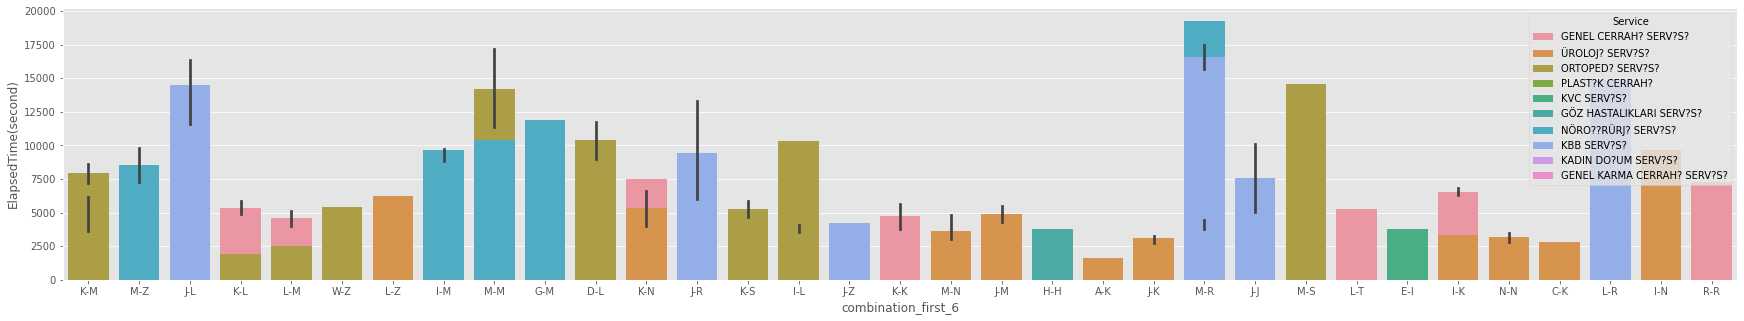

In [45]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x="combination_first_6", y="ElapsedTime(second)", hue="Service", dodge=False, data=app_train_clean)
plt.show()

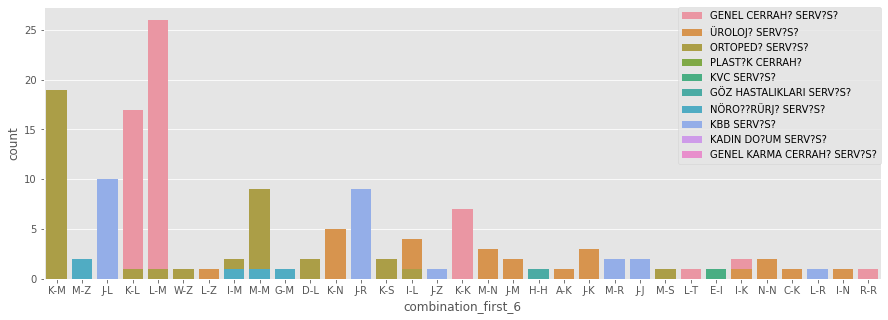

In [46]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x="combination_first_6", hue="Service", dodge=False, data=app_train_clean)
plt.legend(loc='upper right', borderaxespad=0);
plt.show()

In [47]:
app_train_encode = app_train_clean.copy()
app_test_encode = app_test_clean.copy()


In [48]:
app_train_encode['Age_Range'] = pd.cut(app_train_encode['Age'], bins=[0, 18, 45, 65, 102], labels=['child', 'young', 'mid', 'old'])
app_test_encode['Age_Range'] = pd.cut(app_test_encode['Age'], bins=[0, 18, 45, 65, 102], labels=['child', 'young', 'mid', 'old'])


In [49]:
train_ohe_cols = list(app_train_encode.columns[3:5]) + list(app_train_encode.columns[6:10]) + list(app_train_encode.columns[20:])
test_ohe_cols = list(app_test_encode.columns[3:5]) + list(app_test_encode.columns[6:10]) + list(app_test_encode.columns[19:])


In [50]:
set(train_ohe_cols) - set(test_ohe_cols)

set()

In [51]:
app_train_encode = pd.get_dummies(app_train_encode, columns=train_ohe_cols)
app_test_encode = pd.get_dummies(app_test_encode, columns=test_ohe_cols)
app_train_encode.drop(columns=["DiagnosticICD10Code", "SurgeryGroup", "Diagnos_Clean", "SurgeryGroup_Encode", "Sex_FEMALE", "ID"], inplace = True)
app_test_encode.drop(columns=["DiagnosticICD10Code", "SurgeryGroup", "Diagnos_Clean", "SurgeryGroup_Encode", "Sex_FEMALE", "ID"], inplace = True)



In [52]:
app_train_encode = pd.get_dummies(app_train_encode, columns=train_ohe_cols)

KeyError: "None of [Index(['AnesthesiaType', 'SurgeryName', 'Sex', 'Service', 'DoctorID',\n       'AnaesthetistID', 'combination_first_1', 'combination_first_2',\n       'combination_first_3', 'combination_first_4', 'combination_first_5',\n       'combination_first_6', 'combination_first_7', 'combination_first_8',\n       'combination_first_9', 'combination_first_10', 'combination_first_11',\n       'combination_first_12', 'combination_first_13', 'combination_first_14',\n       'combination_first_15', 'combination_first_16', 'combination_first_17',\n       'combination_first_18', 'combination_first_19', 'combination_first_20',\n       'combination_first_21', 'combination_first_22', 'combination_first_23',\n       'combination_first_24', 'combination_first_25', 'combination_first_26',\n       'combination_first_27', 'combination_first_28', 'combination_first_29',\n       'combination_first_30', 'combination_first_31', 'combination_all_1',\n       'combination_all_2', 'combination_all_3', 'combination_all_4',\n       'combination_all_5', 'combination_all_6', 'combination_all_7',\n       'combination_all_8', 'combination_all_9', 'combination_all_10',\n       'combination_all_11', 'combination_all_12', 'combination_all_13',\n       'combination_all_14', 'combination_all_15', 'combination_all_16',\n       'combination_all_17', 'combination_all_18', 'combination_all_19',\n       'combination_all_20', 'combination_all_21', 'combination_all_22',\n       'combination_all_23', 'combination_all_24', 'combination_all_25',\n       'combination_all_26', 'combination_all_27', 'combination_all_28',\n       'combination_all_29', 'combination_all_30', 'combination_all_31',\n       'Age_Range'],\n      dtype='object')] are in the [columns]"

In [ ]:
app_test_encode = pd.get_dummies(app_test_encode, columns=test_ohe_cols)

In [ ]:
app_train_encode.drop(columns=["DiagnosticICD10Code", "SurgeryGroup", "Diagnos_Clean", "SurgeryGroup_Encode", "Sex_FEMALE", "ID"], inplace = True)
app_test_encode.drop(columns=["DiagnosticICD10Code", "SurgeryGroup", "Diagnos_Clean", "SurgeryGroup_Encode", "Sex_FEMALE", "ID"], inplace = True)

In [52]:
filtered_cols = app_train_encode.filter(like='gangrensiz veya obstr')
new_col = filtered_cols.sum(axis=1)
app_train_encode["SurgeryName_Tek tarafl? veya tan?mlanmam?? inguinal herni, gangrensiz veya obstrüksiyonsuz_merged"] = new_col
app_train_encode = app_train_encode.drop(columns=filtered_cols.columns)

In [53]:
filtered_cols = app_test_encode.filter(like='gangrensiz veya obstr')
new_col = filtered_cols.sum(axis=1)
app_test_encode["SurgeryName_Tek tarafl? veya tan?mlanmam?? inguinal herni, gangrensiz veya obstrüksiyonsuz_merged"] = new_col
app_test_encode = app_test_encode.drop(columns=filtered_cols.columns)

In [54]:
target = app_train_encode["ElapsedTime(second)"]
app_train_encode, app_test_encode = app_train_encode.align(app_test_encode, join = 'inner', axis = 1)

In [55]:
app_train_encode["ElapsedTime(second)"] = target


In [56]:
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import re


regex = re.compile(r"\[|\]|<", re.IGNORECASE)
y = app_train_encode["ElapsedTime(second)"]
X = app_train_encode.drop(columns=["ElapsedTime(second)"])
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

mse_errs = []
rmse_errs = []
mae_errs = []
r2_errs = []

models = []

kf = KFold(n_splits=10, shuffle=True, random_state= 42)

for split_train, split_val in list(kf.split(X)):
    
    split_train = X.index[split_train]
    split_val = X.index[split_val]
    
    X_train, y_train = X.loc[split_train], y.loc[split_train]
    X_val, y_val = X.loc[split_val], y.loc[split_val]
    print("Train shape:", X_train.shape, "|", "Val Shape:", X_val.shape)

    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    

    model.fit(X_train, y_train, eval_set = [(X_val, y_val), (X_train, y_train)], eval_metric='rmse')
    
    preds = model.predict(X_val)
    
    rmse_err = mean_squared_error(y_val, preds, squared=False)
    print("Fold RMSE: ", rmse_err)
    rmse_errs.append(rmse_err)

    mse_err = mean_squared_error(y_val, preds)
    print("Fold MSE: ", mse_err)
    mse_errs.append(mse_err)

    mae_err = mean_absolute_error(y_val, preds)
    print("Fold MAE: ", mae_err)
    mae_errs.append(mae_err)

    r2_err = r2_score(y_val, preds)
    print("Fold R2: ", r2_err)
    r2_errs.append(r2_err)

    models.append(model)
    
    print("\n", "*"*70, "\n")

import plotly.express as px
importance = [model.feature_importances_ for model in models]

f_importance = pd.concat([pd.Series(X.columns.to_list(),name='Feature'),
                        pd.Series(np.mean(importance,axis=0),name="Importance")],
                        axis=1).sort_values(by='Importance',
                                            ascending=True)

fig = px.bar(f_importance.tail(20),x='Importance',y='Feature')
fig.update_layout(
    title_text="First 20 Important Features - XGB Average of Folds"
)
fig.show()

Train shape: (2442, 1520) | Val Shape: (272, 1520)
[0]	validation_0-rmse:4112.94758	validation_1-rmse:3980.71757
[1]	validation_0-rmse:3147.13055	validation_1-rmse:3021.61019


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2493.84618	validation_1-rmse:2396.85903
[3]	validation_0-rmse:2082.73255	validation_1-rmse:1976.80262
[4]	validation_0-rmse:1864.32886	validation_1-rmse:1720.22272
[5]	validation_0-rmse:1731.62529	validation_1-rmse:1552.33511
[6]	validation_0-rmse:1659.68909	validation_1-rmse:1442.61757
[7]	validation_0-rmse:1624.87857	validation_1-rmse:1369.38966
[8]	validation_0-rmse:1614.61274	validation_1-rmse:1326.08988
[9]	validation_0-rmse:1594.88857	validation_1-rmse:1282.85588
[10]	validation_0-rmse:1585.59666	validation_1-rmse:1268.05099
[11]	validation_0-rmse:1592.77213	validation_1-rmse:1254.13167
[12]	validation_0-rmse:1591.20203	validation_1-rmse:1240.13893
[13]	validation_0-rmse:1591.40606	validation_1-rmse:1230.89286
[14]	validation_0-rmse:1583.85366	validation_1-rmse:1219.04407
[15]	validation_0-rmse:1578.36018	validation_1-rmse:1207.27042
[16]	validation_0-rmse:1578.65234	validation_1-rmse:1201.62856
[17]	validation_0-rmse:1589.72999	validation_1-rmse:1184.25898


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[3]	validation_0-rmse:2398.59585	validation_1-rmse:1979.73383
[4]	validation_0-rmse:2146.28814	validation_1-rmse:1740.30997
[5]	validation_0-rmse:1985.87639	validation_1-rmse:1577.55428
[6]	validation_0-rmse:1900.60458	validation_1-rmse:1476.45912
[7]	validation_0-rmse:1857.71909	validation_1-rmse:1405.18470
[8]	validation_0-rmse:1791.53998	validation_1-rmse:1334.76749
[9]	validation_0-rmse:1745.78815	validation_1-rmse:1283.02952
[10]	validation_0-rmse:1725.57816	validation_1-rmse:1248.70654
[11]	validation_0-rmse:1728.88428	validation_1-rmse:1215.19766
[12]	validation_0-rmse:1723.75582	validation_1-rmse:1200.32327
[13]	validation_0-rmse:1708.63949	validation_1-rmse:1182.01184
[14]	validation_0-rmse:1694.33821	validation_1-rmse:1173.49665
[15]	validation_0-rmse:1692.48184	validation_1-rmse:1166.12146
[16]	validation_0-rmse:1693.79409	validation_1-rmse:1153.91786
[17]	validation_0-rmse:1686.90954	validation_1-rmse:1145.37454
[18]	validation_0-rmse:1672.35486	validation_1-rmse:1140.69908

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2327.42926	validation_1-rmse:2402.22834
[3]	validation_0-rmse:1961.14992	validation_1-rmse:2004.00308
[4]	validation_0-rmse:1734.25501	validation_1-rmse:1752.60813
[5]	validation_0-rmse:1612.12638	validation_1-rmse:1575.00495
[6]	validation_0-rmse:1538.79669	validation_1-rmse:1448.73015
[7]	validation_0-rmse:1527.26830	validation_1-rmse:1385.51762
[8]	validation_0-rmse:1509.29196	validation_1-rmse:1325.57574
[9]	validation_0-rmse:1503.15388	validation_1-rmse:1292.48642
[10]	validation_0-rmse:1490.87787	validation_1-rmse:1270.60061
[11]	validation_0-rmse:1484.49390	validation_1-rmse:1249.13334
[12]	validation_0-rmse:1474.71626	validation_1-rmse:1225.91011
[13]	validation_0-rmse:1477.49251	validation_1-rmse:1216.94203
[14]	validation_0-rmse:1468.14142	validation_1-rmse:1200.24620
[15]	validation_0-rmse:1467.98544	validation_1-rmse:1194.37889
[16]	validation_0-rmse:1466.38104	validation_1-rmse:1189.28960
[17]	validation_0-rmse:1459.05631	validation_1-rmse:1167.96810


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2195.87834	validation_1-rmse:2403.01178
[3]	validation_0-rmse:1871.07746	validation_1-rmse:2003.23646
[4]	validation_0-rmse:1692.32655	validation_1-rmse:1758.09307
[5]	validation_0-rmse:1598.10229	validation_1-rmse:1586.96773
[6]	validation_0-rmse:1561.29870	validation_1-rmse:1472.57510
[7]	validation_0-rmse:1544.86264	validation_1-rmse:1406.22514
[8]	validation_0-rmse:1514.64510	validation_1-rmse:1348.48512
[9]	validation_0-rmse:1510.29381	validation_1-rmse:1316.95641
[10]	validation_0-rmse:1500.66978	validation_1-rmse:1290.80391
[11]	validation_0-rmse:1497.26646	validation_1-rmse:1278.67815
[12]	validation_0-rmse:1494.37095	validation_1-rmse:1263.52160
[13]	validation_0-rmse:1496.95995	validation_1-rmse:1250.81024
[14]	validation_0-rmse:1497.82994	validation_1-rmse:1244.59581
[15]	validation_0-rmse:1505.66131	validation_1-rmse:1235.30992
[16]	validation_0-rmse:1508.47827	validation_1-rmse:1227.41510
[17]	validation_0-rmse:1505.07043	validation_1-rmse:1218.41375


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2138.35838	validation_1-rmse:2416.44168
[3]	validation_0-rmse:1788.36163	validation_1-rmse:2014.60175
[4]	validation_0-rmse:1566.65154	validation_1-rmse:1749.66662
[5]	validation_0-rmse:1464.65148	validation_1-rmse:1583.46723
[6]	validation_0-rmse:1412.03213	validation_1-rmse:1487.66539
[7]	validation_0-rmse:1386.29500	validation_1-rmse:1391.62826
[8]	validation_0-rmse:1357.63731	validation_1-rmse:1346.69559
[9]	validation_0-rmse:1344.90701	validation_1-rmse:1309.12045
[10]	validation_0-rmse:1340.77461	validation_1-rmse:1288.41416
[11]	validation_0-rmse:1342.74952	validation_1-rmse:1271.01515
[12]	validation_0-rmse:1343.89052	validation_1-rmse:1259.75951
[13]	validation_0-rmse:1338.53637	validation_1-rmse:1237.37226
[14]	validation_0-rmse:1340.68326	validation_1-rmse:1228.33485
[15]	validation_0-rmse:1342.25140	validation_1-rmse:1219.70386
[16]	validation_0-rmse:1337.68009	validation_1-rmse:1205.25304
[17]	validation_0-rmse:1337.43174	validation_1-rmse:1199.49248


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[1]	validation_0-rmse:3036.34113	validation_1-rmse:3038.04804
[2]	validation_0-rmse:2478.52878	validation_1-rmse:2400.86880
[3]	validation_0-rmse:2146.88855	validation_1-rmse:1997.30279
[4]	validation_0-rmse:1951.57956	validation_1-rmse:1738.60904
[5]	validation_0-rmse:1822.04003	validation_1-rmse:1553.49107
[6]	validation_0-rmse:1751.29215	validation_1-rmse:1440.03492
[7]	validation_0-rmse:1726.66841	validation_1-rmse:1375.29384
[8]	validation_0-rmse:1692.98102	validation_1-rmse:1335.58601
[9]	validation_0-rmse:1680.58690	validation_1-rmse:1299.39239
[10]	validation_0-rmse:1671.14457	validation_1-rmse:1262.95907
[11]	validation_0-rmse:1670.04902	validation_1-rmse:1248.14119
[12]	validation_0-rmse:1671.12860	validation_1-rmse:1230.72348
[13]	validation_0-rmse:1668.76811	validation_1-rmse:1222.16481
[14]	validation_0-rmse:1671.00172	validation_1-rmse:1207.46996
[15]	validation_0-rmse:1664.64689	validation_1-rmse:1194.32819
[16]	validation_0-rmse:1658.53607	validation_1-rmse:1185.27412
[

c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2730.80303	validation_1-rmse:2378.01998
[3]	validation_0-rmse:2390.35732	validation_1-rmse:1979.30935
[4]	validation_0-rmse:2155.16159	validation_1-rmse:1710.46995
[5]	validation_0-rmse:2020.83343	validation_1-rmse:1545.10651
[6]	validation_0-rmse:1943.87753	validation_1-rmse:1449.74270
[7]	validation_0-rmse:1906.89633	validation_1-rmse:1376.37078
[8]	validation_0-rmse:1871.00197	validation_1-rmse:1322.81560
[9]	validation_0-rmse:1861.38572	validation_1-rmse:1285.03961
[10]	validation_0-rmse:1839.75030	validation_1-rmse:1257.68149
[11]	validation_0-rmse:1834.76163	validation_1-rmse:1242.70557
[12]	validation_0-rmse:1826.66365	validation_1-rmse:1230.36167
[13]	validation_0-rmse:1827.59870	validation_1-rmse:1209.32800
[14]	validation_0-rmse:1825.89896	validation_1-rmse:1201.98337
[15]	validation_0-rmse:1818.04671	validation_1-rmse:1185.99114
[16]	validation_0-rmse:1810.09831	validation_1-rmse:1167.30660
[17]	validation_0-rmse:1808.69519	validation_1-rmse:1161.43921


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2572.22662	validation_1-rmse:2400.79054
[3]	validation_0-rmse:2186.27621	validation_1-rmse:2006.15055
[4]	validation_0-rmse:1955.90763	validation_1-rmse:1745.49906
[5]	validation_0-rmse:1793.23183	validation_1-rmse:1576.12397
[6]	validation_0-rmse:1691.05560	validation_1-rmse:1466.26978
[7]	validation_0-rmse:1646.52627	validation_1-rmse:1402.10456
[8]	validation_0-rmse:1607.04038	validation_1-rmse:1331.02906
[9]	validation_0-rmse:1599.40149	validation_1-rmse:1303.55133
[10]	validation_0-rmse:1593.88250	validation_1-rmse:1276.70749
[11]	validation_0-rmse:1590.48842	validation_1-rmse:1262.07337
[12]	validation_0-rmse:1590.33660	validation_1-rmse:1234.75751
[13]	validation_0-rmse:1578.72152	validation_1-rmse:1213.98908
[14]	validation_0-rmse:1580.85402	validation_1-rmse:1206.20546
[15]	validation_0-rmse:1580.37452	validation_1-rmse:1197.40454
[16]	validation_0-rmse:1577.65136	validation_1-rmse:1190.39919
[17]	validation_0-rmse:1577.70572	validation_1-rmse:1182.03428


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2304.46928	validation_1-rmse:2421.14171
[3]	validation_0-rmse:1968.99057	validation_1-rmse:2018.17114
[4]	validation_0-rmse:1771.34583	validation_1-rmse:1740.72397
[5]	validation_0-rmse:1673.78715	validation_1-rmse:1581.26205
[6]	validation_0-rmse:1631.34239	validation_1-rmse:1477.91395
[7]	validation_0-rmse:1592.16998	validation_1-rmse:1384.57173
[8]	validation_0-rmse:1581.38615	validation_1-rmse:1323.66515
[9]	validation_0-rmse:1570.94626	validation_1-rmse:1295.19620
[10]	validation_0-rmse:1567.97572	validation_1-rmse:1275.50420
[11]	validation_0-rmse:1542.10183	validation_1-rmse:1248.63442
[12]	validation_0-rmse:1541.09465	validation_1-rmse:1233.41839
[13]	validation_0-rmse:1530.98414	validation_1-rmse:1216.53185
[14]	validation_0-rmse:1509.71086	validation_1-rmse:1204.58368
[15]	validation_0-rmse:1507.35746	validation_1-rmse:1192.83127
[16]	validation_0-rmse:1506.71499	validation_1-rmse:1185.06265
[17]	validation_0-rmse:1506.69386	validation_1-rmse:1179.29383


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[2]	validation_0-rmse:2577.33050	validation_1-rmse:2404.80959
[3]	validation_0-rmse:2219.12372	validation_1-rmse:2005.24117
[4]	validation_0-rmse:2013.06000	validation_1-rmse:1743.50347
[5]	validation_0-rmse:1857.38124	validation_1-rmse:1562.72329
[6]	validation_0-rmse:1765.66789	validation_1-rmse:1449.92680
[7]	validation_0-rmse:1728.57734	validation_1-rmse:1380.86339
[8]	validation_0-rmse:1725.80072	validation_1-rmse:1338.26033
[9]	validation_0-rmse:1710.15694	validation_1-rmse:1285.92411
[10]	validation_0-rmse:1699.30912	validation_1-rmse:1263.99245
[11]	validation_0-rmse:1686.47588	validation_1-rmse:1233.22382
[12]	validation_0-rmse:1681.10396	validation_1-rmse:1220.19314
[13]	validation_0-rmse:1677.77927	validation_1-rmse:1206.83497
[14]	validation_0-rmse:1674.71152	validation_1-rmse:1187.07231
[15]	validation_0-rmse:1679.71764	validation_1-rmse:1177.39957
[16]	validation_0-rmse:1675.46472	validation_1-rmse:1171.98136
[17]	validation_0-rmse:1674.81613	validation_1-rmse:1167.35189


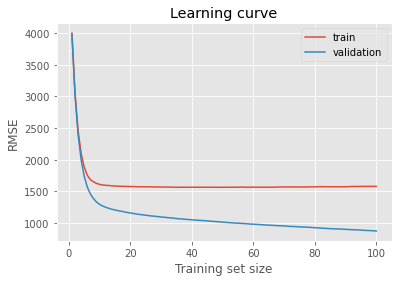

In [62]:
train_errors = []
val_errors = []

# Loop over the sizes of the training set
for i in range(1,101):
    # Concatenate the models' evaluation results from the first i folds
    train_evals = [models[j].evals_result()['validation_0']['rmse'][:i] for j in range(len(models))]
    val_evals = [models[j].evals_result()['validation_1']['rmse'][:i] for j in range(len(models))]
    
    # Compute the mean and standard deviation of the evaluation results at each training set size
    train_mean = np.mean(train_evals, axis=0)
    train_std = np.std(train_evals, axis=0)
    val_mean = np.mean(val_evals, axis=0)
    val_std = np.std(val_evals, axis=0)
    
    # Append the mean errors to the lists
    train_errors.append(train_mean[-1])
    val_errors.append(val_mean[-1])
    
# Plot the learning curve
plt.plot(range(1, 101), train_errors, label='train')
plt.plot(range(1, 101), val_errors, label='validation')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.title('Learning curve')
plt.legend()
plt.show()





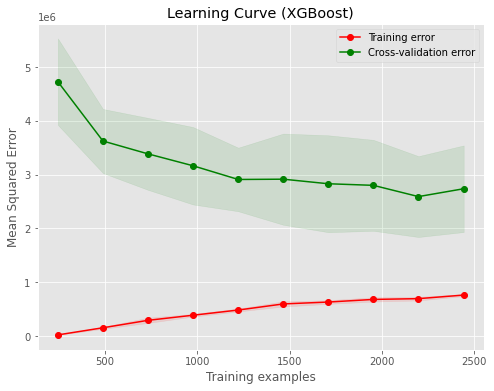

In [63]:
from sklearn.model_selection import learning_curve
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, valid_scores = learning_curve(
    model, X, y, train_sizes=train_sizes, cv=10, scoring="neg_mean_squared_error", n_jobs=-1)

# Calculate the mean and standard deviation of the training and validation scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = -np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, valid_mean - valid_std,
                 valid_mean + valid_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r",
         label="Training error")
plt.plot(train_sizes, valid_mean, 'o-', color="g",
         label="Cross-validation error")
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.title("Learning Curve (XGBoost)")
plt.show()

In [57]:
user_id = test["ID"]

model_preds = [model.predict(app_test_encode) for model in models]
model_preds

[array([2678.2932, 3324.8564, 7554.463 , ..., 4114.513 , 3750.1475,
        4778.654 ], dtype=float32),
 array([2718.8513, 2921.1208, 8243.914 , ..., 4400.9478, 3259.5571,
        4690.5854], dtype=float32),
 array([2576.7397, 3352.3645, 7642.4023, ..., 3591.344 , 3787.337 ,
        4706.4604], dtype=float32),
 array([2697.3445, 3191.259 , 8171.2715, ..., 3712.1997, 3190.315 ,
        5796.748 ], dtype=float32),
 array([2496.6108, 3423.7021, 8056.803 , ..., 3613.4924, 3770.2354,
        4921.0493], dtype=float32),
 array([2613.4768, 3328.9893, 7343.8867, ..., 4094.5596, 3052.7625,
        4750.7393], dtype=float32),
 array([2556.3008, 3323.5095, 8309.201 , ..., 3657.6284, 3546.865 ,
        4884.3726], dtype=float32),
 array([2581.7456, 3302.1687, 7756.2246, ..., 4617.6265, 3678.857 ,
        4951.5967], dtype=float32),
 array([2547.5498, 3294.0857, 8062.0464, ..., 3764.9324, 3527.4111,
        4816.4746], dtype=float32),
 array([2597.4739, 3015.313 , 7633.0483, ..., 2932.7227, 3487.19

In [58]:
sample_submission = pd.DataFrame()
sample_submission['ID'] = user_id
sample_submission['ElapsedTime(second)'] = np.round(np.mean(model_preds,axis=0)).astype(int)

In [126]:
sample_submission.head()

,ID,ElapsedTime(second)
0,1669,2582
1,2091,3265
2,585,7893
3,1455,7824
4,1801,2302


In [59]:
sample_submission.head()

,ID,ElapsedTime(second)
0,1669,2606
1,2091,3248
2,585,7877
3,1455,7830
4,1801,2275


In [60]:
sample_submission.shape

(1211, 2)

In [61]:
sample_submission.to_csv("sample_submission.csv", index = False)

### Private LB best rmse: 1273.2294